# 회귀분석

* 코드 실습

사이킷런의 데이터세트로부터 캘리포니아 주택가격 데이터를 가져온 뒤 이를 데이터프레임으로 변환한다.

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the California housing dataset
california = fetch_california_housing()
# 데이터 셋을 pandas DataFrame으로 변환, 특징 이름을 열 이름으로 사용
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['PRICE'] = california.target # 주택 가격에 해당하는 목표 값(target)을 'PRICE'라는 새 열로 추가

In [2]:
# 데이터프레임의 상위 5개의 행 출력
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# 행의 수와 열의 수 확인
california_df.shape

(20640, 9)

데이터 프렘임의 전체 정보를 요약하여 출력   
1. 데이터프렘의 총 행 수와 열 수
2. 각 열의 이름
3. 각 열의 데이터 타입(int64, float64, object 등)
4. 각 열에 존재하는 비어 있지 않은(non-null)값의 개수
5. 데이터프레임의 메모리 사용량

In [4]:
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


데이터 프레임에서 결측치(Na,NaN) 존재하는 각 열의 개수를 확인

In [5]:
california_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

변수들과 주택가격(prices) 사이의 선형관계를 파악하기 위해 산점도와 선형 회귀직선을 함께 시각화해본다.

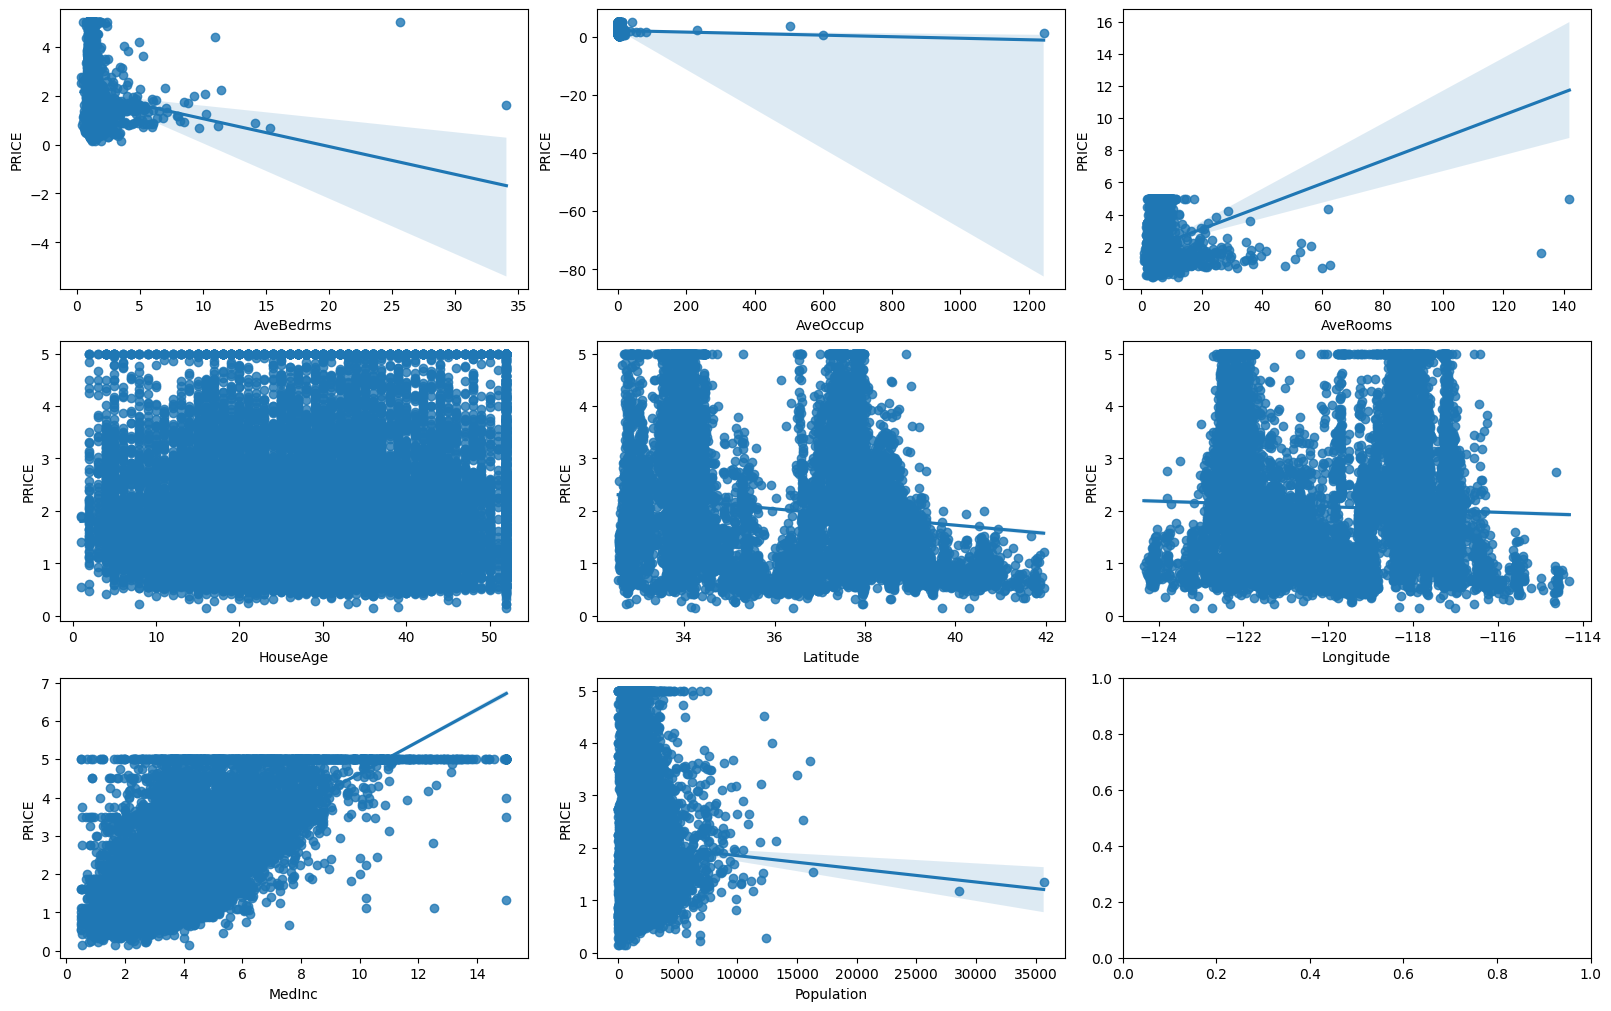

In [6]:
# 그래프 그리기에 필요한 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# 3개의 행과 4개의 열을 가진 subplot을 생성하며, 그림 크기를 16x10 인치로 설정
fig, axs = plt.subplots(figsize=(16, 10), ncols=3, nrows=3, constrained_layout=True)

# 데이터프레임에서 'PRICE'를 제외한 나머지 열 이름 가져오기
features = california_df.columns.difference(['PRICE'])

# 9개의 특징을 반복하면서 subplot에 그래프 그리기
for i, feature in zip(range(9), features):
    row = int(i / 3)  # subplot의 행 번호 설정
    col = i % 3       # subplot의 열 번호 설정
    
    # seaborn의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 시각화
    sns.regplot(x=feature, y=california_df['PRICE'], data=california_df, ax=axs[row][col])

### 2. 데이터 분할

캘리포니아 주택가격 데이터를 8:2의 비율로 학습세트와 평가세트로 분할한다.

In [8]:
from sklearn.model_selection import train_test_split # 데이터셋 분할

x = california_df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']].values # 특징 값(x)과 목표 값(y)을 추출
y = california_df['PRICE'].values # x는 'PRICE'를 제외한 모든 특징을 포함하고, y는 'PRICE' 열을 포함

# 데이터의 20%는 테스트용, 80%는 학습용으로 사용, random_state=42는 데이터를 동일하게 분할할 수 있도록 설정
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

연속형 자료인 데이터가 임의적으로 잘 나뉘었는지 점검   
분할된 데이터의 종소변수의 평균을 확인한다

In [9]:
print('학습데이터세트 PRICE 평균: ', y_train.mean())
print('평가데이터세트 PRICE 평균: ', y_test.mean())

학습데이터세트 PRICE 평균:  2.071946937378876
평가데이터세트 PRICE 평균:  2.0550030959302323


### 3. 전처리

캘리포니아 주택각격 데이터의 변수는 다양한 수치들로 구성 되어있다.   
최솟값이 0, 최댓값이 1이 되도록 Min-Max 방법으로 정규화한다.

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # 특징 값을 0 ~ 1 사이로 변환해주는 MinMaxScaler 인스턴스 생성
# 학습 데이터를 기준으로 스케일러를 학습(fit)시키고, 특징 값들을 0과 1 사이로 변환
x_train_scaled = scaler.fit_transform(x_train)

### 4.모델학습

회귀분석은 선형 회귀(LinearRegresssion)알고리즘 사용

In [11]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression() # 선형 회귀 모델의 인스턴스 생성
linear.fit(x_train_scaled, y_train) # 스케일링된 학습 데이터와 목표 값을 사용하여 선형 회귀 모델 학습

LinearRegression()

pred_train과 y_train을 비교해 학습세트로 훈련한 모델의 예측성능을 평가할 수 있다.   
사이킷런의 mean_absolute_error, mean_squared_error, r2_score 클래스를 사용   
결정계수(R-square)는 데이터에 대한 모델의 설명력을 평가하는 지표이다.

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# 학습된 선형 회귀 모델을 사용하여 스케일링된 학습 데이터에 대해 예측 수행
pred_train = linear.predict(x_train_scaled)


mae = mean_absolute_error(y_train, pred_train) # 실제 값과 예측 값 사이의 평균 절대 오차(MAE)를 계산
mse = mean_squared_error(y_train, pred_train) # 실제 값과 예측 값 사이의 평균 제곱 오차(MSE)를 계산
rmse = np.sqrt(mse) # MSE의 제곱근을 구하여 제곱근 평균 제곱 오차(RMSE)를 계산
r2 = r2_score(y_train, pred_train) # R2 점수(결정 계수)를 계산하여 모델이 설명하는 분산의 비율을 확인

# MAE, MSE, RMSE, R2 점수를 소수점 5자리까지 출력
print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))

MAE:  0.52863
MSE:  0.51793
RMSE:  0.71968
R2:  0.61255


### 5. 성능평가 및 예측값 저장

평가세트에 훈련된 모델을 적용

In [13]:
x_test_scaled = scaler.transform(x_test) # 학습 데이터로 학습된 스케일러를 사용하여 테스트 데이터를 스케일링
pred = linear.predict(x_test_scaled) # 학습된 선형 회귀 모델을 사용하여 스케일링된 테스트 데이터에 대해 예측 수행

pred와 y_test를 비교해 선형 회귀 몯레의 예측성능을 최종적으로 평가

In [14]:
mae = mean_absolute_error(y_test, pred) #평균 절대 오차(MAE)를 계산
mse = mean_squared_error(y_test, pred) # 평균 제곱 오차(MSE)를 계산
rmse = np.sqrt(mse) # MSE의 제곱근을 구하여 제곱근 평균 제곱 오차(RMSE)를 계산
r2 = r2_score(y_test, pred) # 테스트 데이터에서 모델이 설명하는 분산의 비율을 나타내는 R2 점수 계산

# MAE, MSE, RMSE, R2 점수를 소수점 5자리까지 출력
print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))

MAE:  0.53320
MSE:  0.55589
RMSE:  0.74558
R2:  0.57579


실제 값과 예측 결과를 비교하도록 데이터프레임으로 저장

In [15]:
# 예측 값(pred)으로부터 'pred Price'라는 열 이름을 가진 pandas DataFrame을 생성
pred_df = pd.DataFrame(pred, columns=['pred Price'])
pred_df.head() #DataFrame의 상위 5개의 행을 출력

,pred Price
0,0.719123
1,1.764017
2,2.709659
3,2.838926
4,2.604657


In [16]:
# 컬럼명을 actual Price로 하는 데이터프레임으로 변환
actual = pd.DataFrame(y_test, columns=['actual Price'])
actual.head()

,actual Price
0,0.47700
1,0.45800
2,5.00001
3,2.18600
4,2.78000


In [17]:
# 실제 값 DataFrame과 예측 값 DataFrame(pred_df)을 열 방향(axis=1)으로 병합
reg_result = pd.concat([actual, pred_df], axis=1)

# 병합된 DataFrame(reg_result)을 'reg_result.csv'라는 이름으로 CSV 파일로 저장
# index=False는 인덱스 열이 CSV 파일에 저장되지 않도록 설정
# encoding='utf-8-sig'는 CSV 파일에서 특수 문자가 올바르게 인코딩되도록 설정
reg_result.to_csv('reg_result.csv', index=False, encoding='utf-8-sig')

# 병합된 DataFrame의 상위 5개 행을 출력하여 결과를 확인
reg_result.head()


,actual Price,pred Price
0,0.47700,0.719123
1,0.45800,1.764017
2,5.00001,2.709659
3,2.18600,2.838926
4,2.78000,2.604657
